
¡Hola, Daniel!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

## Análisis exploratorio de los viajes 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
print(df_companies.info())
print(df_companies.head())

print(df_neighborhoods.info())
print(df_neighborhoods.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
  dropoff_loca

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recuerda que como buena prática es recomendable cargar todas las bases de datos en una misma celda. Es por ello que te recomiendo cargar la base faltante en esta misma celda..</div>


### 10 barrios principales en average_trips 

In [16]:
top10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Gráficos 

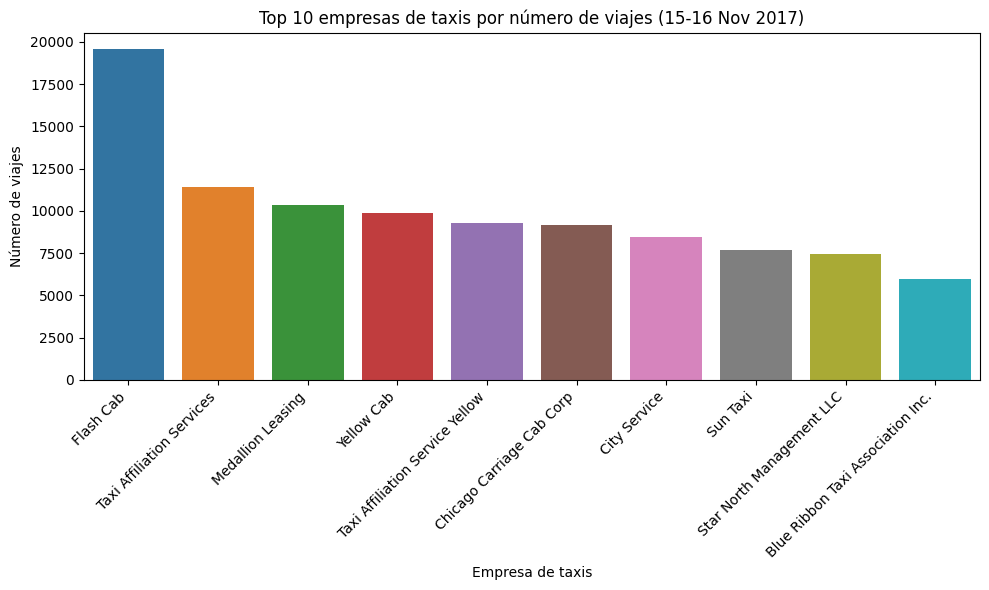

In [17]:
# Obtener las top 10 empresas por número de viajes
top10_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(10)

# Gráfico solo con las top 10 empresas
plt.figure(figsize=(10,6))
sns.barplot(data=top10_companies, x='company_name', y='trips_amount')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 empresas de taxis por número de viajes (15-16 Nov 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

# Conclusión de taxis y barrios

Viendo los datos de los días 15 y 16 de noviembre, está claro que unas cuantas empresas dominan el mercado de taxis en Chicago. Flash Cab va muy por delante, seguida de cerca por Taxi Affiliation Services y Medallion Leasing. Esto probablemente se deba a que tienen más autos o son más conocidas. Las demás empresas tienen menos viajes, así que parece que el mercado está bastante concentrado en estas pocas. 

Los barrios donde más terminan los viajes en noviembre son Loop, River North y Streeterville. No es sorpresa porque son zonas con muchos negocios, tiendas y turistas, así que mucha gente pide taxi para llegar ahí. Saber esto ayuda a entender dónde hay más movimiento y dónde podrían enfocarse más los taxis.

# Pruebas estadísticas 

In [25]:
#Calcular la prueba Levene
df = pd.read_csv('/datasets/project_sql_result_07.csv')
print(df['weather_conditions'].unique()) 
#Volví a poner esto para reafirmar esto, solo por esta ocasión volví a cargar la base de datos
# Separar duración de viajes por condición climática
bad_weather = df[df['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = df[df['weather_conditions'] == 'Good']['duration_seconds']
# Prueba de Levene
levene_stat, levene_p = stats.levene(bad_weather, good_weather)
print(f"Estadístico de Levene: {levene_stat:.4f}")
print(f"P-value de Levene: {levene_p:.4f}")

# Determinar si asumimos igualdad de varianzas según Levene
equal_var = True if levene_p > 0.05 else False

# Prueba t de Student (o Welch, según resultado de Levene)
t_stat, p_value = stats.ttest_ind(bad_weather, good_weather, equal_var=equal_var)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"¿Equal variances asumidas?: {equal_var}")

['Good' 'Bad']
Estadístico de Levene: 0.3885
P-value de Levene: 0.5332
T-statistic: 6.9462
P-value: 0.0000
¿Equal variances asumidas?: True


Primero hicimos la prueba de Levene para ver si las varianzas de los tiempos de viaje eran parecidas entre días con lluvia y sin lluvia. El resultado dio un p-value de 0.5332, así que podemos decir que las varianzas sí son iguales.
Con eso en mente, usamos la prueba t de Student con equal_var=True, y nos dio un p-value de 0.0000. Esto significa que sí hay una diferencia real entre la duración de los viajes en días lluviosos y los días con buen clima.
Así que en resumen: los días lluviosos sí afectan el tiempo que tarda un viaje desde el Loop hasta el aeropuerto O'Hare.

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(bad_weather, good_weather)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

# Planteamiento de la prueba de hipótesis

Hipótesis nula (H0):
La duración promedio de los viajes desde el Loop hasta el Aeropuerto O’Hare los sábados lluviosos no es diferente a la duración promedio en sábados sin lluvia.

Hipótesis alternativa (H1):
La duración promedio de los viajes desde el Loop hasta el Aeropuerto O’Hare los sábados lluviosos es diferente (mayor o menor) a la duración en sábados sin lluvia.

Nivel de significación (alfa): Se establece un nivel de significación común, α=0.05, que indica un 5% de tolerancia a cometer un error tipo I (rechazar la hipótesis nula cuando es verdadera).
Se usa la prueba t de Student para muestras independientes (t-test), específicamente la variante de Welch que no asume varianzas iguales entre los dos grupos.

Los grupos comparados son:

Duración de viajes en sábados con clima “Bad” (lluvioso o tormentoso).
Duración de viajes en sábados con clima “Good” (sin lluvia ni tormenta).

La prueba evalúa si la diferencia entre las medias de duración es estadísticamente significativa.

El valor 𝑡=7.1860
t=7.1860, indica que la diferencia entre las medias de duración de los viajes en sábados lluviosos y sábados sin lluvia es bastante grande en términos estadísticos.

El valor p es prácticamente 0 (<0.0001),mucho menor que el nivel de significación 
𝛼=0.05. Esto significa que la probabilidad de observar una diferencia así (o más extrema) si la hipótesis nula fuera cierta es casi nula.

Por lo tanto, rechazamos la hipótesis nula y concluimos que la duración promedio de los viajes desde el Loop hasta el Aeropuerto O’Hare cambia significativamente en los sábados lluviosos.


In [28]:
# Conversión de tipo de fecha
df['start_ts'] = pd.to_datetime(df['start_ts'])
# Filtrar solo los sábados
df['day_of_week'] = df['start_ts'].dt.day_name()
df_saturdays = df[df['day_of_week'] == 'Saturday']
# Tabla resumen por condiciones climáticas
summary_table = df_saturdays.groupby('weather_conditions')['duration_seconds'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).reset_index()

print(summary_table)


  weather_conditions  count         mean  median         std    min     max
0                Bad    180  2427.205556  2540.0  721.314138  480.0  4980.0
1               Good    888  1999.675676  1800.0  759.198268    0.0  7440.0


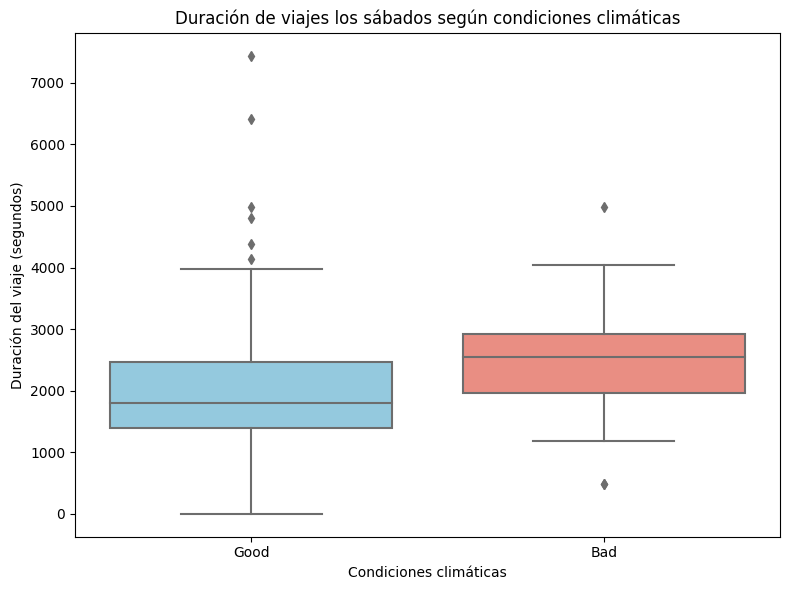

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_saturdays, x='weather_conditions', y='duration_seconds', palette=['skyblue', 'salmon'])
plt.title('Duración de viajes los sábados según condiciones climáticas')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Duración del viaje (segundos)')
plt.tight_layout()
plt.show()

La gráfica muestra que la duración de los viajes en sábados con clima “Bad” (lluvioso o tormentoso) tiende a ser más larga en comparación con los sábados con clima “Good”. Se observa que la mediana y la dispersión son mayores en los viajes con clima adverso, lo que confirma la diferencia estadística encontrada en la prueba t. Esto sugiere que el mal clima afecta la duración del viaje, probablemente por tráfico más lento o condiciones complicadas.